# Task 2

### Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle.

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings("ignore")

### IMPORT DATASET

In [3]:
train_data = pd.read_csv(r"D:\Data Sceince\Prodigy\Task2\titanic\train.csv")
train_data.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.000,F2,S
776,777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.750,F38,Q


In [6]:
test_data = pd.read_csv(r"D:\Data Sceince\Prodigy\Task2\titanic\test.csv")
test_data.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
222,1114,2,"Cook, Mrs. (Selena Rogers)",female,22.0,0,0,W./C. 14266,10.500,F33,S
196,1088,1,"Spedden, Master. Robert Douglas",male,6.0,0,2,16966,134.500,E34,C
253,1145,3,"Salander, Mr. Karl Johan",male,24.0,0,0,7266,9.325,NaN,S


# Data Cleaning

In [9]:
print("train_data Column, Rows :",train_data.shape)
print("test_data Column, Rows :",test_data.shape)

train_data Column, Rows : (891, 12)
test_data Column, Rows : (418, 11)


### Check Data Type

In [12]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [14]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


### Checking Duplicate Values

In [17]:
print("Duplicate value in training dataset rows",train_data.duplicated().sum().sum())
print("Duplicate value in testing dataset rows",test_data.duplicated().sum().sum())

Duplicate value in training dataset rows 0
Duplicate value in testing dataset rows 0


### Checking Null Values

In [20]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Drop Unused Column

In [25]:
train_data.drop(columns=["Cabin"],inplace = True)
test_data.drop(columns=["Cabin"],inplace = True)

### Fill Null Column

In [28]:
train_data["Age"].fillna(train_data["Age"].median(),inplace=True)
test_data["Age"].fillna(test_data["Age"].median(),inplace=True)
test_data["Fare"].fillna(test_data["Fare"].median(),inplace =True)

In [30]:
train_data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### Encoding

In [33]:
label_enocoder = LabelEncoder()
train_data["Embarked"] = label_enocoder.fit_transform(train_data["Embarked"])
train_data.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
650,651,0,3,"Mitkoff, Mr. Mito",male,28.0,0,0,349221,7.8958,2
501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,1
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8.0500,2


In [35]:
train_data["Embarked"].unique()

array([2, 0, 1, 3])

### Again Checking Null Value

In [38]:
print("Null Value in Training Dataset", train_data.isnull().sum().sum())
print("Null Value in Testing Dataset", test_data.isnull().sum().sum())

Null Value in Training Dataset 0
Null Value in Testing Dataset 0


# Explorartory Data Analysis

### 1. Summary Statistics

***Training Data Summaray Statistics:***


In [43]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,1.538721
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


***Testing Data Summaray Statistics:***


In [46]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 2. Check Survival Rate

In [57]:
image_folder = r"D:\Data Sceince\Prodigy\Task2\titanic\Visuals"

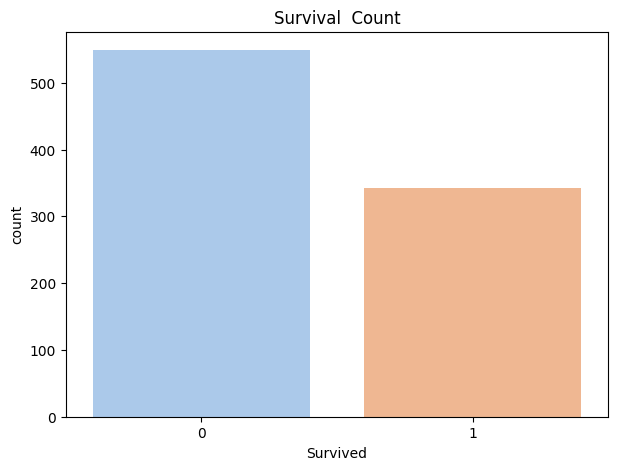

In [59]:
plt.figure(figsize=(7,5))
sns.countplot(data = train_data,x="Survived", palette="pastel")
plt.title("Survival  Count")
plt.savefig(os.path.join(image_folder,"Survival Count"))
plt.show()

### 2. Check Survival Rate By Gender

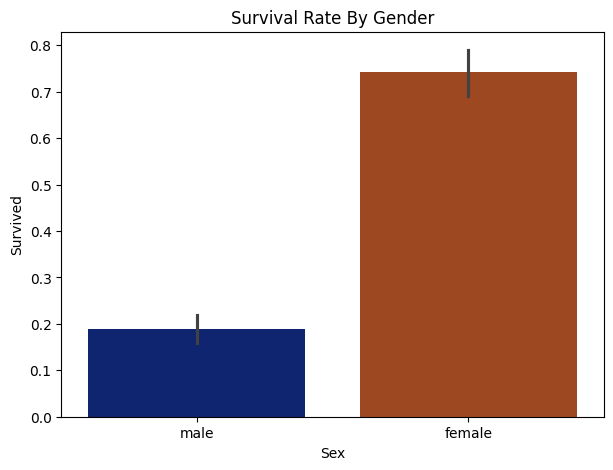

In [63]:
plt.figure(figsize=(7,5))
sns.barplot(data=train_data,x="Sex",y="Survived",palette="dark",)
plt.title("Survival Rate By Gender")
plt.savefig(os.path.join(image_folder,"Survival Rate By Gender"))
plt.show()

### 3. Check Survival Rate By Passenger Class

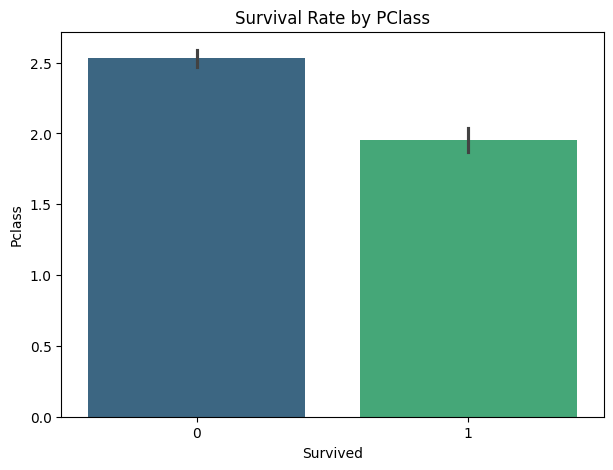

In [65]:
plt.figure(figsize=(7,5))
sns.barplot(data=train_data,x="Survived",y="Pclass",palette="viridis")
plt.title("Survival Rate by PClass")
plt.savefig(os.path.join(image_folder,"Survival Rate By PClass"))
plt.show()

### 4. Age Distibution

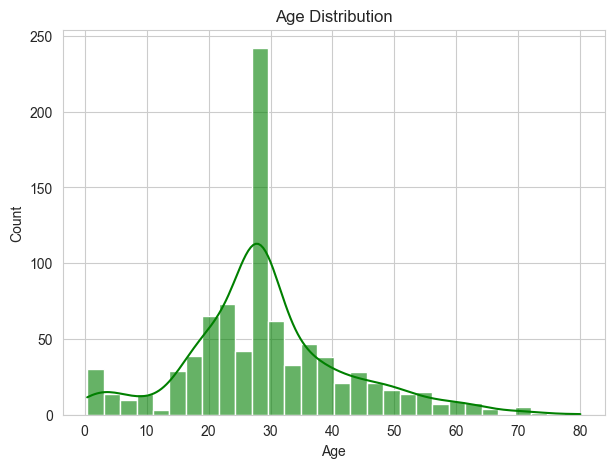

In [71]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.histplot(data=train_data, x="Age",kde=True,color="green",alpha=0.6)
plt.title("Age Distribution")
plt.savefig(os.path.join(image_folder,"Age Distribution"))
plt.show()

### 5. Fare Distibution

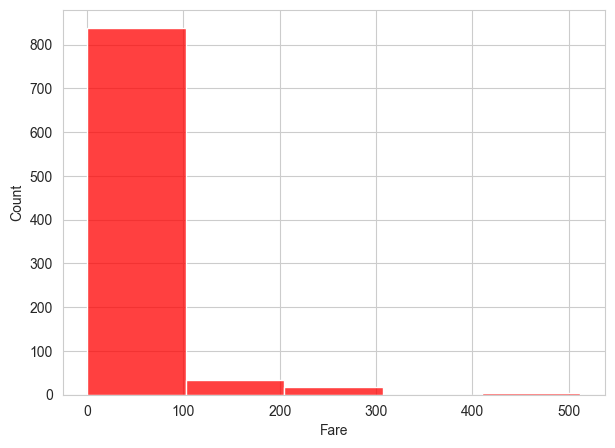

In [75]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.histplot(data=train_data,x="Fare",bins=5,color="red")
plt.savefig(os.path.join(image_folder,"Fare Distribution"))
plt.show()

In [174]:
men = train_data.loc[train_data.Sex == "male"]["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [180]:
Women = train_data.loc[train_data.Sex == "female"]["Survived"]
rate_Women = sum(Women)/len(Women)
print("% of Women who survived:", rate_Women)


% of Women who survived: 0.7420382165605095


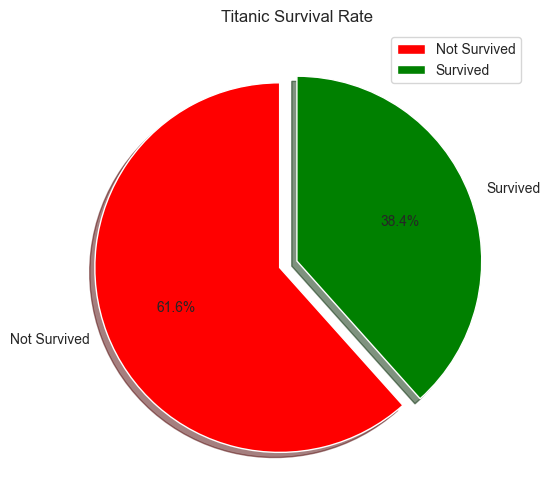

In [77]:
# Count survival values
survival_counts = train_data['Survived'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', colors=['red', 'green'],shadow=True,explode=[0.1,0],startangle=90)
plt.title('Titanic Survival Rate')
plt.legend()
plt.savefig(os.path.join(image_folder," Titanic Survival Rate"))
plt.show()
